<a href="https://colab.research.google.com/github/AnilSharma09/CODSOFT/blob/main/TASK_4_SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving advertising.csv to advertising.csv
Dataset shape: (200, 4)

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


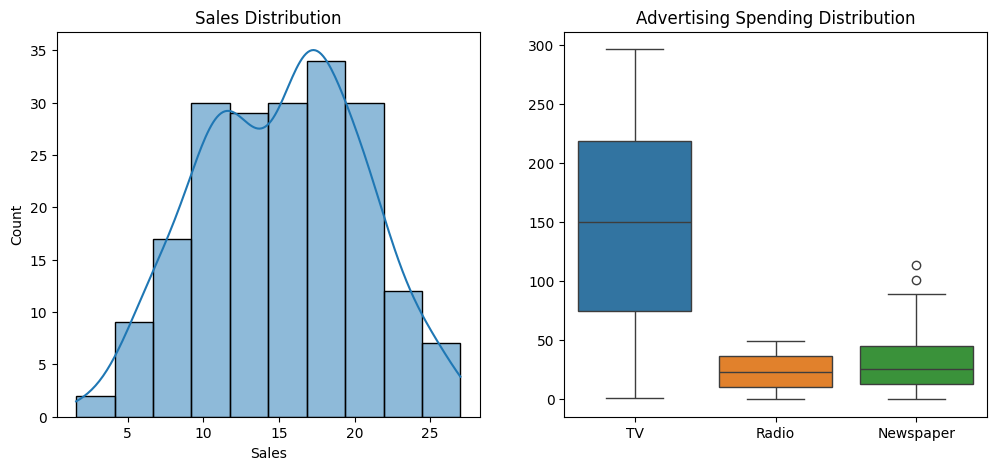

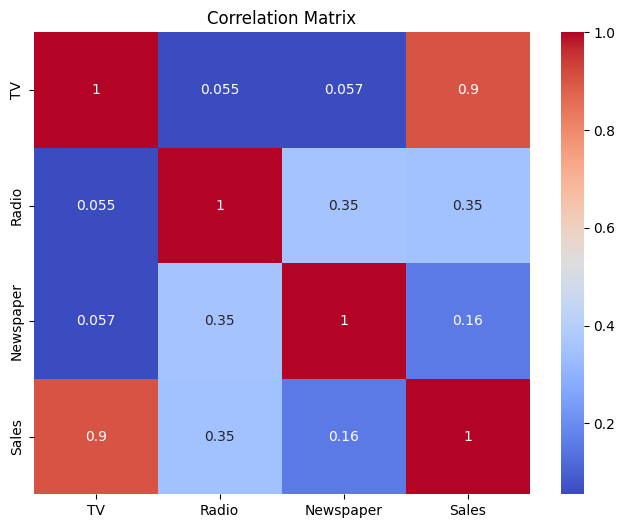


=== Random Forest ===
RMSE: 1.20
R2 Score: 0.95

=== XGBoost ===
RMSE: 1.20
R2 Score: 0.95


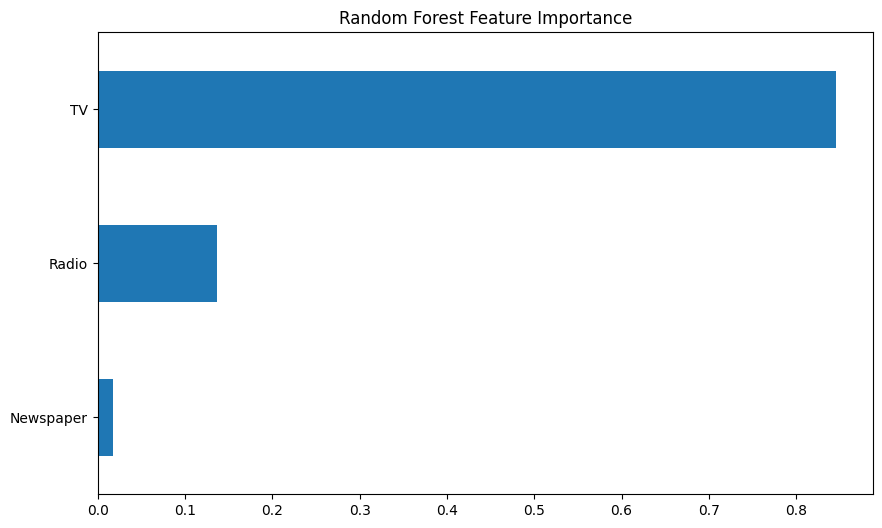


=== Sample Predictions ===

Sample 1:
Features:
TV           237.4
Radio         27.5
Newspaper     11.0
Name: 68, dtype: float64
Actual Sales: 16.90
Predicted Sales: 19.77
Difference: 2.87

Sample 2:
Features:
TV            7.3
Radio        28.1
Newspaper    41.4
Name: 56, dtype: float64
Actual Sales: 22.40
Predicted Sales: 6.55
Difference: 15.85

Sample 3:
Features:
TV           170.2
Radio          7.8
Newspaper     35.2
Name: 177, dtype: float64
Actual Sales: 21.40
Predicted Sales: 16.90
Difference: 4.50

Sample 4:
Features:
TV           213.5
Radio         43.0
Newspaper     33.8
Name: 84, dtype: float64
Actual Sales: 7.30
Predicted Sales: 22.64
Difference: 15.34

Sample 5:
Features:
TV           220.3
Radio         49.0
Newspaper      3.2
Name: 128, dtype: float64
Actual Sales: 24.70
Predicted Sales: 22.96
Difference: 1.74


In [ ]:
# -*- coding: utf-8 -*-
"""
Sales Prediction - CodSoft Task 4
"""

# Step 1: Install required packages
!pip install pandas scikit-learn seaborn xgboost

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Load dataset
from google.colab import files
uploaded = files.upload()

# Using Advertising dataset (can replace with your dataset)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Step 4: Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Advertising Spending Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Data Preprocessing
# Separate features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Step 6: Model Training
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'model': pipeline
    }

    print(f"\n=== {name} ===")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Step 7: Feature Importance (for best model)
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = results[best_model_name]['model']

# Get feature names
if len(cat_cols) > 0:
    # Get one-hot encoded feature names
    ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(cat_cols)
    all_features = np.concatenate([num_cols, cat_features])
else:
    all_features = num_cols

# Get feature importances
if best_model_name == "Random Forest":
    importances = best_model.named_steps['regressor'].feature_importances_
elif best_model_name == "XGBoost":
    importances = best_model.named_steps['regressor'].feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
pd.Series(importances, index=all_features).sort_values().plot(kind='barh')
plt.title(f'{best_model_name} Feature Importance')
plt.show()

# Step 8: Sample Predictions
sample = X_test.sample(5, random_state=42)
sample_pred = best_model.predict(sample)

print("\n=== Sample Predictions ===")
for i in range(len(sample)):
    print(f"\nSample {i+1}:")
    print("Features:")
    print(sample.iloc[i])
    print(f"Actual Sales: {y_test.iloc[i]:.2f}")
    print(f"Predicted Sales: {sample_pred[i]:.2f}")
    print(f"Difference: {abs(y_test.iloc[i] - sample_pred[i]):.2f}")